In [45]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [46]:
df = pd.read_csv('../data/raw/arquivo_geral.csv', sep=';', parse_dates=['data'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214 entries, 0 to 2213
Data columns (total 7 columns):
regiao              2214 non-null object
estado              2214 non-null object
data                2214 non-null datetime64[ns]
casosNovos          2214 non-null int64
casosAcumulados     2214 non-null int64
obitosNovos         2214 non-null int64
obitosAcumulados    2214 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 121.2+ KB


In [48]:
new_cases = df.groupby(['data']).agg({
    'casosNovos': 'sum'
})

In [58]:
def plot_ts(series):
    fig, ax = plt.subplots(2, 2, figsize=(15, 11));
    series.plot(ax=ax[0, 0]);
    pd.plotting.autocorrelation_plot(series, ax=ax[0, 1]);
    series.plot.hist(bins=20, ax=ax[1, 0]);
    series.rolling('7D').std().plot(ax=ax[1, 1]);

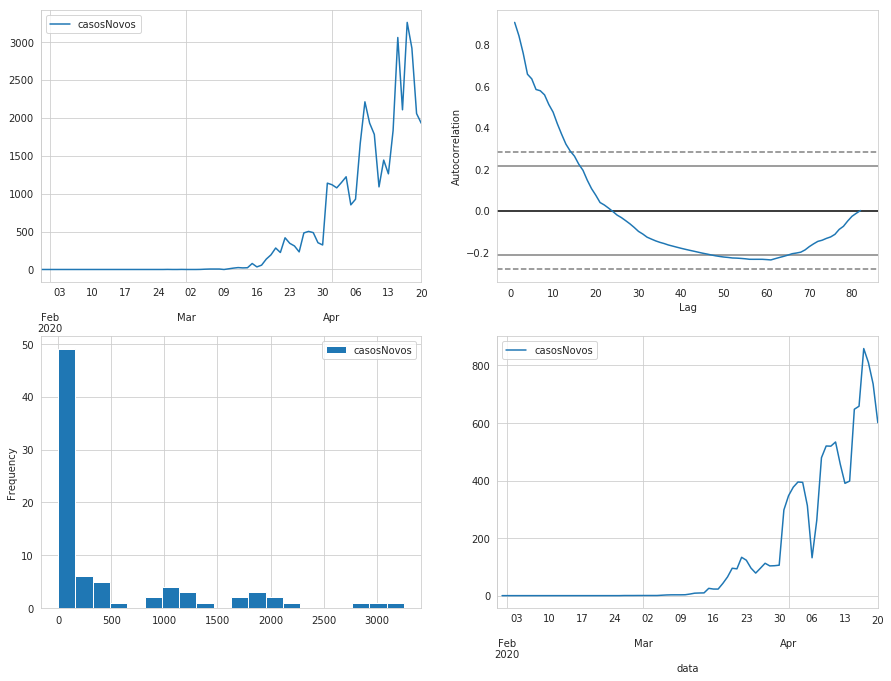

In [59]:
plot_ts(new_cases)

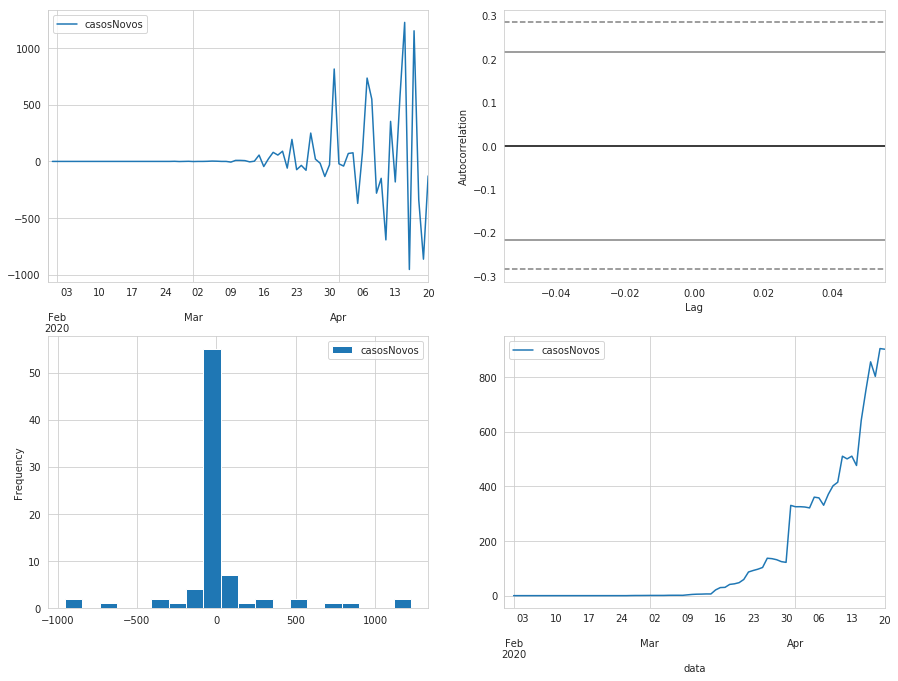

In [60]:
plot_ts(new_cases.diff())